In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from traffic_scores import *

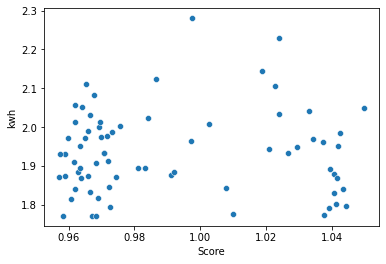

In [6]:
a = kwh_vs_score(load_relevant_traffic('selectk'), load_kwh())

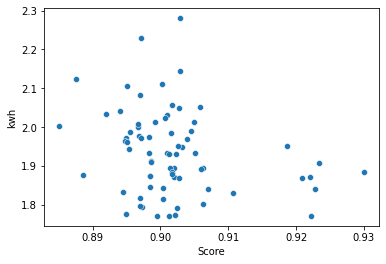

In [2]:
b = kwh_vs_score(load_all_traffic(), load_kwh())

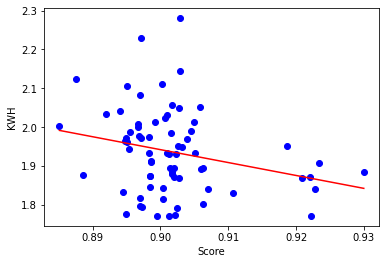

In [3]:
from scipy.stats import linregress

x = b['Score']
y = b['kwh']
gradient, intercept, r_value, p_value, std_err = linregress(x, y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.ylabel("KWH")
plt.xlabel("Score")
plt.show()

In [4]:
r_value

-0.25505872552417164

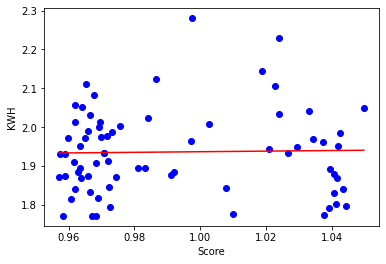

In [7]:
from scipy.stats import linregress

x = a['Score']
y = a['kwh']
gradient, intercept, r_value, p_value, std_err = linregress(x, y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.ylabel("KWH")
plt.xlabel("Score")
plt.show()

In [8]:
r_value

0.02248099965731227

In [ ]:
seg_day_scores = traffic.groupby(["Date", "Segment ID"]).agg({"Score": 'mean'})

In [ ]:
seg_day_scores = seg_day_scores.reset_index()
seg_day_scores.head()

In [ ]:
seg_day_scores = seg_day_scores.pivot(index="Date", columns="Segment ID", values=["Score"])

In [ ]:
kwh = kwh[['Date', 'kwh']]

In [ ]:
merged = pd.merge(kwh, seg_day_scores, on="Date")

In [ ]:
merged = merged.fillna(merged.mean())

In [ ]:
X = merged.drop(['kwh', 'Date'], axis=1)
y = merged['kwh']
Xn = X.drop(X[X.columns[X.isna().any(axis=0)]].columns, axis=1) # drops cols with all na

In [ ]:
from sklearn.feature_selection import SelectKBest

model = SelectKBest()
model.fit_transform(Xn, y)
model.get_support()

In [ ]:
X_new = Xn.iloc[:, model.get_support()]

In [ ]:
seg_imp = pd.DataFrame(data={'Segment ID': X_new.columns.get_level_values(1)})

In [ ]:
meta = pd.read_csv('metadata.csv')
seg_imp_meta = pd.merge(seg_imp, meta, on="Segment ID")
seg_imp_meta

In [9]:
data = pd.read_csv("data.csv")
data.columns

Index(['Date Time', 'Segment ID', 'UTC Date Time', 'Speed(miles/hour)',
       'Hist Av Speed(miles/hour)', 'Ref Speed(miles/hour)',
       'Travel Time(Minutes)', 'CValue', 'Pct Score30', 'Pct Score20',
       'Pct Score10', 'Road Closure', 'Corridor/Region Name'],
      dtype='object')